**Kaggle link:** https://www.kaggle.com/mirichoi0218/insurance

# **DATA SCIENCE ITINERARY - IT ACADEMY**

# <center><b><u>Sprint 8. Hypothesis Testing</u></b><center>

## **DATASET INFORMATION**

+ **age:** age of primary beneficiary

+ **sex:** insurance contractor gender, female, male

+ **BMI:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

+ **children:** Number of children covered by health insurance / Number of dependents

+ **smoker:** Smoking

+ **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

+ **charges:** Individual medical costs billed by health insurance

In [621]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import ttest_1samp,ttest_ind, ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [622]:
# Dataset

medical_cost = pd.read_csv('/Users/adrianova/Desktop/Data Science/Python/IT Academy - Python/SPRINT 8 - Tasca del test d\'hipòtesis/Practise/data/medical_cost_personal.csv')
medical_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [623]:
# Types of region
print(medical_cost.region.unique())
print(medical_cost.children.sort_values().unique())

['southwest' 'southeast' 'northwest' 'northeast']
[0 1 2 3 4 5]


In [624]:
# Shape. 1338 rows and 7 columns
medical_cost.shape

(1338, 7)

Maybe this dataset don't have a large amount of observations but we can achieve our objective

In [625]:
# Total elements in our Dataset
medical_cost.size

9366

In [626]:
# Variable information
medical_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [627]:
# Variables description
medical_cost.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


**Age**

    + The average age of the people with health insurance in our data set is 39 years, with the minimum age being 18 years and the maximum age 64 years. 25% of the observations are 27 years old or younger, while 75% of the observations are 51 years old or younger. The median age is 39 years, coinciding with the mean.

**BMI**

    + The average BMI of people with health insurance in our data set is 30.66 (kg / m ^ 2), with the minimum BMI of 15.96 (kg / m ^ 2) and the maximum BMI of 53 , 13 (kg / m ^ 2). 25% of the observations have a BMI of 26.30 (kg / m ^ 2) or less, while 75% of the observations have a BMI of 34.69 (kg / m ^ 2) or less. The median BMI is at 30.40 (kg / m ^ 2), very close to the average.

**Children**

    + The average number of children of people with health insurance in our data set is 1 child, with the minimum number of children being 0 and the maximum number of children being 5 children. 25% of the observations have 0 children, while 75% of the observations have 2 children or less. The median of children is found in 1 child coinciding with the mean.

**Charges**

    + The average bill of people with health insurance in our data set is $ 13,270, with the minimum bill being $ 1,121 and the maximum bill $ 63,770. 25% of the observations have a bill of $ 4,740 or less, while 75% of the observations have a bill of $ 16,639 or less. The median bill is $ 9,382, far from the average.

In [628]:
# Missings. We don't have missing observations

missings = medical_cost.isna().sum()/len(medical_cost)*100
missings

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

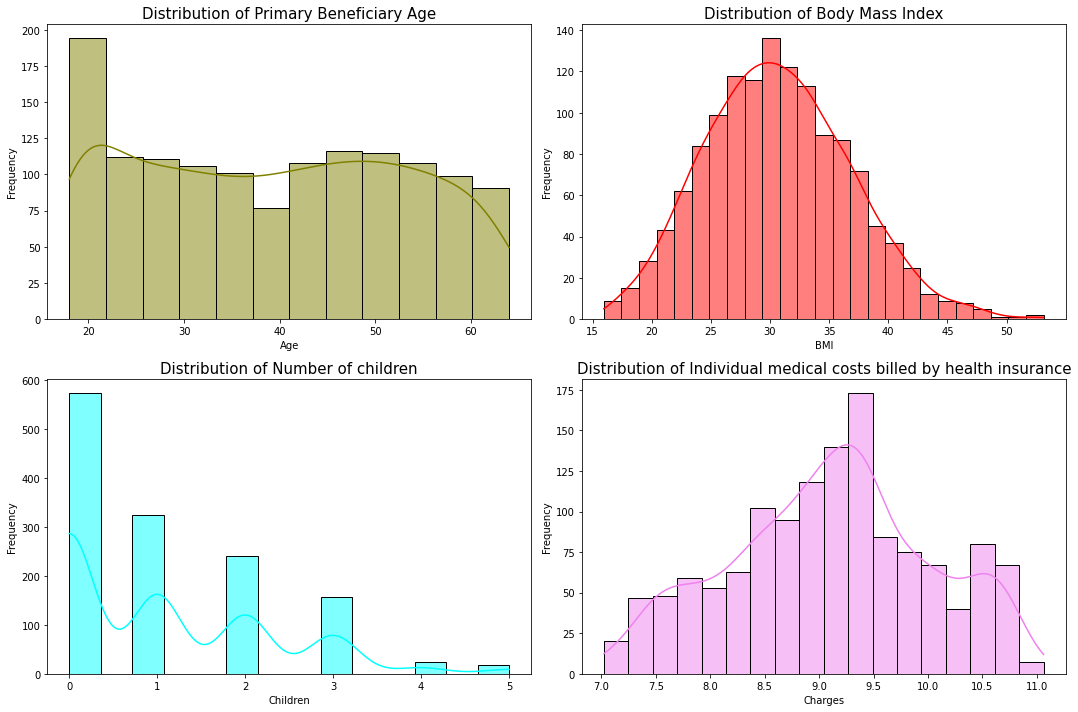

In [629]:
# Distribution of variable Age, BMI, Children and Charges

# Figure Structure
fig = plt.figure(figsize=(15,10))

# First plot
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.histplot( x = 'age', data = medical_cost, kde=True, color = 'olive')
plt.title('Distribution of Primary Beneficiary Age', fontsize = 15)   
plt.xlabel('Age')   
plt.ylabel('Frequency')        

# Second plot
ax1 = fig.add_subplot(2,2,2)
ax1 = sns.histplot( x = 'bmi', data = medical_cost, kde=True, color = 'red')
plt.title('Distribution of Body Mass Index', fontsize = 15)   
plt.xlabel('BMI')   
plt.ylabel('Frequency')  

# Third plot
ax1 = fig.add_subplot(2,2,3)
ax1 = sns.histplot( x = 'children', data = medical_cost, kde=True, color = 'cyan')
plt.title('Distribution of Number of children', fontsize = 15)   
plt.xlabel('Children')   
plt.ylabel('Frequency') 

# Forth plot (log(charges))
ax1 = fig.add_subplot(2,2,4)
ax1 = sns.histplot( x = np.log(medical_cost.charges), data = medical_cost, kde=True, color = 'violet')
plt.title('Distribution of Individual medical costs billed by health insurance', fontsize = 15)   
plt.xlabel('Charges')   
plt.ylabel('Frequency') 

plt.tight_layout()
plt.show()

In [630]:
# Numeric Correlation

medical_cost[['age','bmi','children','charges']].corr().style.background_gradient(cmap="Greens")

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


We can see how the correlation between variables is very soft

## **EXERCISE 1**

**STATEMENT:** Grab a sports theme dataset you like and select an attribute from the dataset. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha. 

### **FIRST OPTION**

      + We want to see if the distribution of medical costs for each citizen in the sample presents a Normal Distribution


+ $\:H_0\:$: The sample has a Gaussian distribution

+ $\:H_A\:$: The sample not has a Gaussian distribution


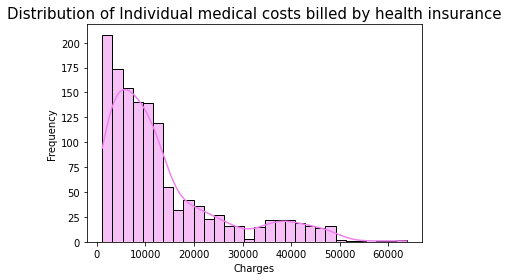

stat = 0.815, p = 0.000
Probably NOT Gaussian


In [631]:
# Shapiro-Wilk Normality Test

data = medical_cost.charges 

# Chart
sns.histplot(data, kde=True, color = 'violet')
plt.title('Distribution of Individual medical costs billed by health insurance', fontsize = 15)   
plt.xlabel('Charges')   
plt.ylabel('Frequency') 
plt.show()

# Statistics
stat, p = shapiro(data)
print(f'stat = %.3f, p = %.3f' %(stat,p))
if p > 0.05:
    print('Probably Gaussian')
else: 
    print('Probably NOT Gaussian')

In [632]:
# Charges Population Mean
population_mean =medical_cost.charges.mean() 
print(f'the Mean of charges population is: %.2f' % (population_mean))

the Mean of charges population is: 13270.42


    + The medical costs paid by citizens do NOT follow a Normal Distribution, we want to see if applying the mean to a given set of samples and making a distribution we get closer to the true mean and it coincides with the original data.



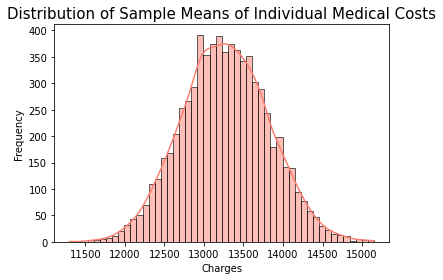

In [633]:
# Distribution of Sample Means

means_charges = []

for i in range(7000):
    charges_sample = medical_cost.charges.sample(n=500, replace=True)
    means_charges.append(charges_sample.mean())

# Chart
sns.histplot(means_charges, kde=True, color = 'salmon')
plt.title('Distribution of Sample Means of Individual Medical Costs', fontsize = 15)  
plt.xlabel('Charges')   
plt.ylabel('Frequency') 
plt.show()

In [634]:
# Mean of Charges Sample Means 
print(f'the Mean of charges population is: %.2f' % (np.mean(means_charges)))

the Mean of charges population is: 13268.82


    + Now I want to check if the mean of the original dataset of the medical cost by citizen is different from the means of the set of sample means. For this we will use the two-sided ttest_1samp (), function for the null hypothesis that the expected value (mean) of a sample of independent observations is equal to the population mean.



+ $\:H_0\:$: mean of original dataset = mean of sample means

+ $\:H_A\:$: mean of original dataset $\neq$ mean of sample means



In [635]:
# Statistics
data = ttest_1samp(a = means_charges, popmean= population_mean)
print(f'stat = %.3f, p = %.3f' %(data.statistic,data.pvalue))
if data.pvalue > 0.05:
    print('Not Reject Hypothesis Null (NRH0)')
else: 
    print('Reject Hypothesis Null (RH0)')

stat = -0.245, p = 0.806
Not Reject Hypothesis Null (NRH0)


    + We obtain a p-value of 0.347 that is higher than the significance level that we have chosen of 5% (0.05). Therefore NRH0 and we can conclude that we do not reject the hypothesis that the original mean is equal to the mean of sample means. This result was expected, because when applying the Central Limit Theorem as the number of samples introduced in the distribution grows, it tends to approach the population mean.


### **SECOND OPTION**

    + Logically, if you are a smoker, you are more likely to trigger a disease. For this reason, I am interested in seeing if smokers pay for private health insurance different from non-smokers.


+ $\:H_0\:$: medical cost of smokers = medical cost of non-smokers

+ $\:H_A\:$:medical cost of smokers $\neq$ medical cost of non-smokers
    

In our dataset, our variable of interest is the medical costs for the citizens of the United States, where we have previously been able to verify that it does not follow a normal distribution. For this reason we have applied the **Box-Cox transformation method** which is used when we want to transform the distribution of a variable so that it appears more Gaussian. In our case we use this method because we have values greater than 0 (there are usually no negative medical costs).

In [636]:
# Separate charges from the rest of our dataset to apply Box-Cox
charges_of_medical_cost = medical_cost['charges']
charges_of_medical_cost = pd.DataFrame(charges_of_medical_cost)


In [637]:
# BOX-COX implementation

from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

boxcox_transform = PowerTransformer(method="box-cox")
ct = ColumnTransformer(transformers=[['boxcox_transform',boxcox_transform,list(range(len(charges_of_medical_cost.columns)))]],remainder='passthrough')
boxcox_X = ct.fit_transform(charges_of_medical_cost).copy()
boxcox_X = pd.DataFrame(boxcox_X,columns=['charges_BOX-COX']).copy()
boxcox_X.head()

,charges_BOX-COX
0,0.681644
1,-1.748873
2,-0.768781
3,0.978814
4,-0.916560


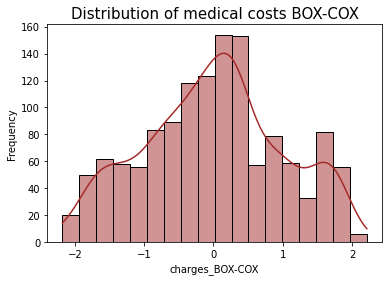

In [638]:
# Distribution of medical costs after normalizing with Box-Cox

#Data
data = boxcox_X['charges_BOX-COX']

# Chart
sns.histplot(data, kde=True, color = 'brown')
plt.title('Distribution of medical costs BOX-COX', fontsize = 15)   
plt.xlabel('charges_BOX-COX')   
plt.ylabel('Frequency') 
plt.show()

In [639]:
# We add the new column to our dataset

medical_cost = pd.concat([medical_cost, boxcox_X], axis = 1)
medical_cost.head()

,age,sex,bmi,children,smoker,region,charges,charges_BOX-COX
0,19,female,27.900,0,yes,southwest,16884.92400,0.681644
1,18,male,33.770,1,no,southeast,1725.55230,-1.748873
2,28,male,33.000,3,no,southeast,4449.46200,-0.768781
3,33,male,22.705,0,no,northwest,21984.47061,0.978814
4,32,male,28.880,0,no,northwest,3866.85520,-0.916560


In [640]:
# Smokers vs No Smokers
print(medical_cost.groupby('smoker')['charges'].count())
print(f'For those who pay the annual medical cost, there are 274 smokers and 1,064 non-smokers')

smoker
no     1064
yes     274
Name: charges, dtype: int64
For those who pay the annual medical cost, there are 274 smokers and 1,064 non-smokers


In [641]:
# Non-Smokers Sample

smokers_charges = medical_cost[medical_cost['smoker'] == 'yes'].index
non_smokers_charges = medical_cost.drop(smokers_charges).sample(100)
non_smokers_charges.head()

,age,sex,bmi,children,smoker,region,charges,charges_BOX-COX
700,21,female,34.870,0,no,southeast,2020.55230,-1.588375
181,18,female,38.280,0,no,southeast,1631.82120,-1.805405
1015,59,male,25.460,0,no,northwest,12124.99240,0.313575
1191,41,female,21.755,1,no,northeast,13725.47184,0.450759
1080,18,male,21.780,2,no,southeast,11884.04858,0.291436


In [642]:
print(f'Mean medical expenses for non-smokers is %.2f dolars'%(non_smokers_charges.charges.mean()))

Mean medical expenses for non-smokers is 8745.65 dolars


In [643]:
# Smokers Sample (sample of medical cost for those who smoke)

smokers_charges = medical_cost[medical_cost['smoker'] == 'yes'].sample(100)
smokers_charges.head()

,age,sex,bmi,children,smoker,region,charges,charges_BOX-COX
1118,33,male,35.750,1,yes,southeast,38282.74950,1.614638
901,60,male,40.920,0,yes,southeast,48673.55880,1.894724
254,50,male,31.825,0,yes,northeast,41097.16175,1.697074
105,20,male,28.025,1,yes,northwest,17560.37975,0.725595
292,25,male,45.540,2,yes,southeast,42112.23560,1.725486


In [644]:
print(f'Mean medical expenses for smokers is %.2f dolars'%(smokers_charges.charges.mean()))

Mean medical expenses for smokers is 32245.48 dolars


    + To check that the means of medical costs between non-smokers and smokers are different we use ttest_ind (). This two-sided test for the null hypothesis that 2 independent samples have equal mean values, assumes that populations have identical variations by default.

In [645]:
# Statistics
stats, p = ttest_ind(smokers_charges['charges_BOX-COX'], non_smokers_charges['charges_BOX-COX']) # We use Box-Cox charges because follows a normal distribution
print(f'stats: %.2f, p: %.2f' %(stats, p))
if p > 0.05:
    print('Not Reject Hypothesis Null (NRH0)')
else:
    print('Reject Hypothesis Null (RH0)')


stats: 17.69, p: 0.00
Reject Hypothesis Null (RH0)


    + The difference is so great between the medical costs paid by smokers and non-smokers that taking a sample of 100 observations to test our hypothesis is enough to reach the conclusion that, indeed, the medical costs between smokers and non-smokers are different.


## **EXERCISE 2**

**STATEMENT:** Continue with the sports theme dataset you like and select two other attributes from the dataset. Calculate the p-values and say if they reject the null hypothesis by taking a 5% alpha.

    + In this exercise we want to study if the medical cost paid by women varies if they live in the northern or southern part of the country. For this we want to add two columns that will divide the observations depending on the region in which they live (north or south).

+ $\:H_0\:$: medical cost of women in the north = medical cost of women in the south

+ $\:H_A\:$: medical cost of women in the north $\neq$ medical cost of women in the south


In [646]:
# North Region

conditionlist = [ (medical_cost['region'] == 'northwest'),(medical_cost['region'] == 'northeast')]
choicelist = [1,1]
medical_cost['north_region'] = np.select(conditionlist, choicelist)

In [647]:
# South Region

conditionlist = [ (medical_cost['region'] == 'southwest'),(medical_cost['region'] == 'southeast')]
choicelist = [1,1]
medical_cost['south_region'] = np.select(conditionlist, choicelist)

In [648]:
# Move the columns to desired place
medical_cost = medical_cost.reindex(columns= [ 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'north_region', 'south_region', 'charges', 'charges_BOX-COX' ])
medical_cost.head(2)

,age,sex,bmi,children,smoker,region,north_region,south_region,charges,charges_BOX-COX
0,19,female,27.90,0,yes,southwest,0,1,16884.9240,0.681644
1,18,male,33.77,1,no,southeast,0,1,1725.5523,-1.748873


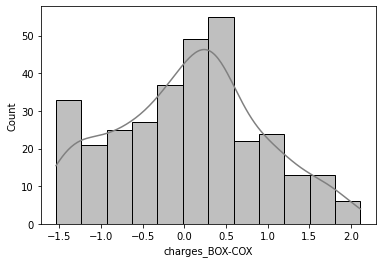

In [649]:
# Women of the North Sample

women_north_sample = medical_cost[(medical_cost['sex'] == 'female') & (medical_cost['north_region'] == 1)]
sns.histplot(women_north_sample['charges_BOX-COX'], kde=True, color = 'gray')
plt.show()

In [650]:
women_north_sample.shape

(325, 10)

In [651]:
print(f'The medical cost of women living in the north is %.2f dolars'%(women_north_sample.charges.mean()))

The medical cost of women living in the north is 12714.35 dolars


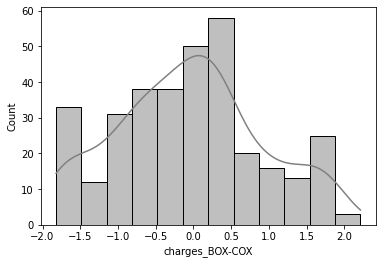

In [652]:
# Women of the North Sample

women_south_sample = medical_cost[(medical_cost['sex'] == 'female') & (medical_cost['south_region'] == 1)]
sns.histplot(women_south_sample['charges_BOX-COX'], kde=True, color = 'gray')
plt.show()

In [653]:
print(f'The medical cost of women living in the south is %.2f dolars'%(women_south_sample.charges.mean()))

The medical cost of women living in the south is 12429.96 dolars


In [654]:
women_south_sample.shape

(337, 10)

    + To use the hypothesis test ttest_rel() and see if the medical cost paid by women in the north is equal to the medical cost paid by women in the south of the country, we need the sample matrices to have the same shape.

In [655]:
# Statistics

stats, p = ttest_ind(women_north_sample['charges_BOX-COX'], women_south_sample['charges_BOX-COX']) # We use Box-Cox charges because follows a normal distribution
print(f'stats: %.2f, p: %.2f' %(stats, p))
if p > 0.05:
    print('Not Reject Hypothesis Null (NRH0)')
else:
    print('Reject Hypothesis Null (RH0)')

stats: 1.39, p: 0.16
Not Reject Hypothesis Null (NRH0)


    + We can conclude that due to a significance level of 5%, we cannot reject the null hypothesis that medical costs for women living in the north are the same as for women living in the south of the country.


## **EXERCISE 3**

**STATEMENT:** Continue with the sports theme dataset you like and select three attributes from the dataset. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

    +We want to know how they affect the medical expenses of women depending on whether they do not have children, have only one child or have 2 children

+ $\:H_0\:$: The medical costs of women who have 0, 1 or 2 children are equals

+ $\:H_A\:$: The medical costs of women who have 0, 1 or 2 children are different

In [656]:
# Number of children per woman 
medical_cost.groupby(['children','sex'])['sex'].count()

children  sex   
0         female    289
          male      285
1         female    158
          male      166
2         female    119
          male      121
3         female     77
          male       80
4         female     11
          male       14
5         female      8
          male       10
Name: sex, dtype: int64

In [657]:
medical_cost.head()

,age,sex,bmi,children,smoker,region,north_region,south_region,charges,charges_BOX-COX
0,19,female,27.900,0,yes,southwest,0,1,16884.92400,0.681644
1,18,male,33.770,1,no,southeast,0,1,1725.55230,-1.748873
2,28,male,33.000,3,no,southeast,0,1,4449.46200,-0.768781
3,33,male,22.705,0,no,northwest,1,0,21984.47061,0.978814
4,32,male,28.880,0,no,northwest,1,0,3866.85520,-0.916560


In [658]:
# Females Without, One and Two Children

medical_cost_female_0 = medical_cost[(medical_cost.sex == 'female') & (medical_cost.children == 0)]
medical_cost_female_1 = medical_cost[(medical_cost.sex == 'female') & (medical_cost.children == 1)]
medical_cost_female_2 = medical_cost[(medical_cost.sex == 'female') & (medical_cost.children == 2)]

# Samples
medical_cost_female_0 = medical_cost_female_0.sample(n = round(len(medical_cost_female_0)*0.7))
medical_cost_female_1 = medical_cost_female_1.sample(n = round(len(medical_cost_female_1)*0.7))
medical_cost_female_2 = medical_cost_female_2.sample(n = round(len(medical_cost_female_2)*0.7))

In [659]:
# Sampling means

sampling_means = {'Sampling Means': [round(medical_cost_female_0['charges'].mean(),2) , round(medical_cost_female_1['charges'].mean(),2) , round(medical_cost_female_2['charges'].mean(),2)]}


# DataFrame
sampling_means = pd.DataFrame(sampling_means, index=['Medical Cost female 0 children','Medical Cost female 1 children', 'Medical Cost female 2 children'])
sampling_means

,Sampling Means
Medical Cost female 0 children,12346.44
Medical Cost female 1 children,13039.22
Medical Cost female 2 children,13558.81


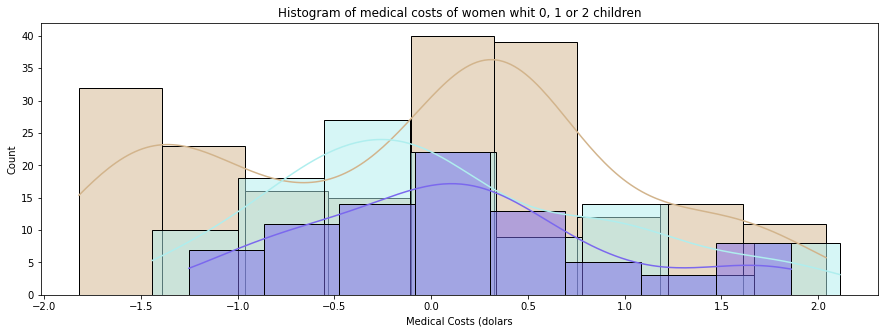

In [660]:
# Histogram of medical costs of women who have 0, 1 or 2 children

plt.figure(figsize=(15,5))                
sns.histplot(x= medical_cost_female_0['charges_BOX-COX'], color = 'tan', kde= True)
sns.histplot(x= medical_cost_female_1['charges_BOX-COX'], color = 'paleturquoise', kde= True)
sns.histplot(x= medical_cost_female_2['charges_BOX-COX'], color = 'mediumslateblue', kde= True)
plt.title('Histogram of medical costs of women whit 0, 1 or 2 children')
plt.xlabel('Medical Costs (dolars')
plt.show()

    + For this hypothesis we will use the ANOVA f_oneway () hypothesis test for two or more groups that have the same population mean. The test is applied to samples of two or more groups, possibly with different sizes.

In [661]:
# Statistics

stats, p = f_oneway(medical_cost_female_0['charges_BOX-COX'], medical_cost_female_1['charges_BOX-COX'], medical_cost_female_2['charges_BOX-COX']) # We use Box-Cox charges because follows a normal distribution
print(f'stats: %.2f, p: %.2f' %(stats, p))
if p > 0.05:
    print('Not Reject Hypothesis Null (NRH0)')
else:
    print('Reject Hypothesis Null (RH0)')

stats: 2.48, p: 0.09
Not Reject Hypothesis Null (NRH0)


    + We can conclude that we reject the null hypothesis that women's medical costs are equal if they do not have children, one child or two children.

    The statistic of 2.48 tells us that there is a variance / variability between the groups of 2.48 times greater than the variance / variability in each group. Our statistic is high, therefore we confirm that there is variability.